# <center>House price prediction with machine learning models 🤖</center>

![house](image.png)

## Contents

- [Getting the data](#getting-the-data)
- [Data analysis](#data-analysis)
- [Data cleaning](#data-cleaning)
- [Data visualization](#data-visualization)
- [Setting up the models](#setting-up-the-models)
- [Training the models](#training-the-models)

## Data description 📝

- `id` - Unique ID for every individual row entry  
- `date` - Date the house was sold  
- `price` - Price of the house  
- `bedrooms` - Number of bedrooms  
- `bathrooms` - Number of bathrooms  
- `sqft_living` - Square footage of the house  
- `sqft_lot` - Square footage of the lot  
- `floors` - Number of floors  
- `waterfront` - Whether the house has a view to a waterfront  
- `view` - How good the view of the property is  
- `condition` - Condition of the house  
- `grade` - Grade given to the house based on the overall construction and design  
- `sqft_above` - Square footage of house apart from the basement  
- `sqft_basement` - Square footage of the basement  
- `yr_built` - Year the house was built  
- `yr_renovated` - Year the house was renovated  
- `zipcode` - Zipcode of the house  
- `lat` - Latitude coordinate  
- `long` - Longitude coordinate  
- `sqft_living15` - Living room area in 2015(implies-- some renovations) This might or - might not have affected the lotsize area  
- `sqft_lot15` - LotSize area in 2015(implies-- some renovations)  

<hr>

In [798]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

## Getting the data

In [799]:
# Create a dataframe from the csv file
df = pd.read_csv('kc_house_data.csv')

In [800]:
# Shape of the dataframe
df.shape

(21613, 21)

<hr>

## Data exploration

In [801]:
# Display the first 5 rows of the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [802]:
# Display the last 5 rows of the dataframe
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [803]:
# Sample random 10 rows from the dataframe
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3068,1865000110,20140929T000000,365000.0,4,2.50,2540,6688,2.0,0,0,...,9,2540,0,2002,0,98092,47.3314,-122.180,2810,6776
18951,2484700145,20141229T000000,559000.0,4,1.75,2250,8458,1.0,0,0,...,8,1450,800,1954,0,98136,47.5235,-122.383,1950,7198
11362,7701960990,20140616T000000,862000.0,4,2.50,3190,14565,2.0,0,0,...,11,3190,0,1990,0,98077,47.7130,-122.072,3420,20475
2541,2738650030,20150511T000000,552500.0,3,2.50,2450,3582,2.0,0,0,...,9,2450,0,2008,0,98072,47.7749,-122.159,2490,5449
2074,2489200070,20140720T000000,767500.0,6,3.50,2410,6000,2.0,0,4,...,9,2220,190,1916,1990,98136,47.5400,-122.382,1980,6000
20989,2135200155,20140805T000000,580000.0,5,3.25,3030,7410,2.0,0,0,...,8,2150,880,2014,0,98106,47.5530,-122.354,2020,7410
17228,8731990440,20150310T000000,299900.0,4,2.75,2330,7200,1.0,0,0,...,8,1560,770,1977,0,98023,47.3203,-122.385,2350,7600
18829,1853080120,20140903T000000,919950.0,5,2.75,3170,7062,2.0,0,0,...,9,3170,0,2014,0,98074,47.5937,-122.061,3210,6891
5258,9287801150,20150423T000000,600000.0,3,1.00,1040,5000,1.5,0,2,...,7,1040,0,1912,0,98107,47.6754,-122.359,1440,4400
878,9536602080,20141219T000000,229000.0,3,1.00,1020,8100,1.0,0,0,...,7,1020,0,1954,0,98198,47.3586,-122.314,1020,8100


In [804]:
# Display the columns of the dataframe
columns_headers = list(df.columns.values)
for i, column in enumerate(columns_headers):
    print(i, column)

0 id
1 date
2 price
3 bedrooms
4 bathrooms
5 sqft_living
6 sqft_lot
7 floors
8 waterfront
9 view
10 condition
11 grade
12 sqft_above
13 sqft_basement
14 yr_built
15 yr_renovated
16 zipcode
17 lat
18 long
19 sqft_living15
20 sqft_lot15


In [805]:
# Display info and the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Data shows the following:

- There are 21,613 rows or entries in the dataset
- There are 21 columns or features in the dataset
- There are different data types in the dataset, including `int64`, `float64`, and `object`
- There are no missing values in the dataset
- There are 15,458 unique values in the `id` column
- Memory usage of the dataset is 3.5+ MB

## Data cleaning

In [806]:
# Search for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [807]:
# Search for duplicate rows
df.duplicated().sum()

0

In [808]:
# Display the statistics of the dataframe. This method provides a summary of the numerical attributes like `count`, `mean`, `min`, `max` and `std`.
df.describe().apply(lambda s: s.apply(lambda x: format(x, '.2f')))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [809]:
df.price.describe().apply(lambda x: format(x, '.2f'))

count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: object

In [810]:
# Numeric Features
for i, feature in enumerate(numeric_features):
    print(i, feature)
print("The number of numeric features is:", i+1)

0 price
1 bedrooms
2 bathrooms
3 sqft_living
4 sqft_lot
5 floors
6 waterfront
7 view
8 condition
9 grade
10 sqft_above
11 sqft_basement
12 yr_built
13 yr_renovated
14 zipcode
15 lat
16 long
17 sqft_living15
18 sqft_lot15
The number of numeric features is: 19


In [811]:
# Categorical Features
categorical_features = df.select_dtypes('object').columns
categorical_features

Index(['date'], dtype='object')

In [812]:
print(f'Number of `Numerical` features: {len(numeric_features)}')
print(f'Number of `Categorical` features: {len(categorical_features)}')
print(f'Total features: {len(numeric_features) + len(categorical_features)}')

Number of `Numerical` features: 19
Number of `Categorical` features: 1
Total features: 20


In [813]:

# Find unique values in dataframe
print(f"Total records in the dataframe: {len(df)}")
for i, col in enumerate(df.columns):
    print(i, col, len(df[col].unique()))

Total records in the dataframe: 21613
0 id 21436
1 date 372
2 price 4028
3 bedrooms 13
4 bathrooms 30
5 sqft_living 1038
6 sqft_lot 9782
7 floors 6
8 waterfront 2
9 view 5
10 condition 5
11 grade 12
12 sqft_above 946
13 sqft_basement 306
14 yr_built 116
15 yr_renovated 70
16 zipcode 70
17 lat 5034
18 long 752
19 sqft_living15 777
20 sqft_lot15 8689


In [814]:
# Transform all years renovated to 1 if they are renovated
df.loc[df['yr_renovated'] > 1, 'yr_renovated'] = 1

In [815]:
# Transform this column to categories, so we can use it as a feature
group = ["view","yr_renovated","waterfront"]
for col in group:
    df[col] =df [col].astype("category", copy=False)

In [816]:
# Remove columns that are not required
df.drop(['id', "date", "zipcode"], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [817]:
# View dataset updated
df.dtypes

price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated     category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

## Data visualization

<Axes: title={'center': 'Price vs Location'}, xlabel='Longitude', ylabel='Latitude'>

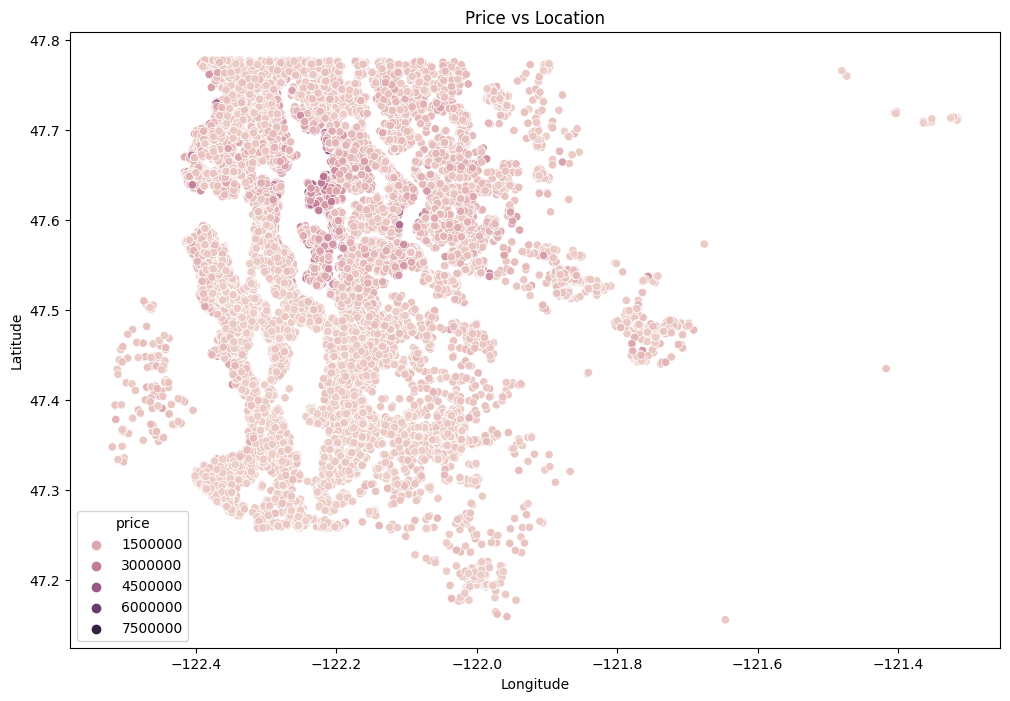

In [818]:
# Dispersion diagram. This diagram shows the relationship between the price and its location
plt.figure(figsize=(12, 8))
plt.title('Price vs Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
sns.scatterplot(x='long', y='lat', data=df, hue='price')

<Axes: title={'center': 'Number of houses built in a particular year'}, xlabel='Year Built', ylabel='Density'>

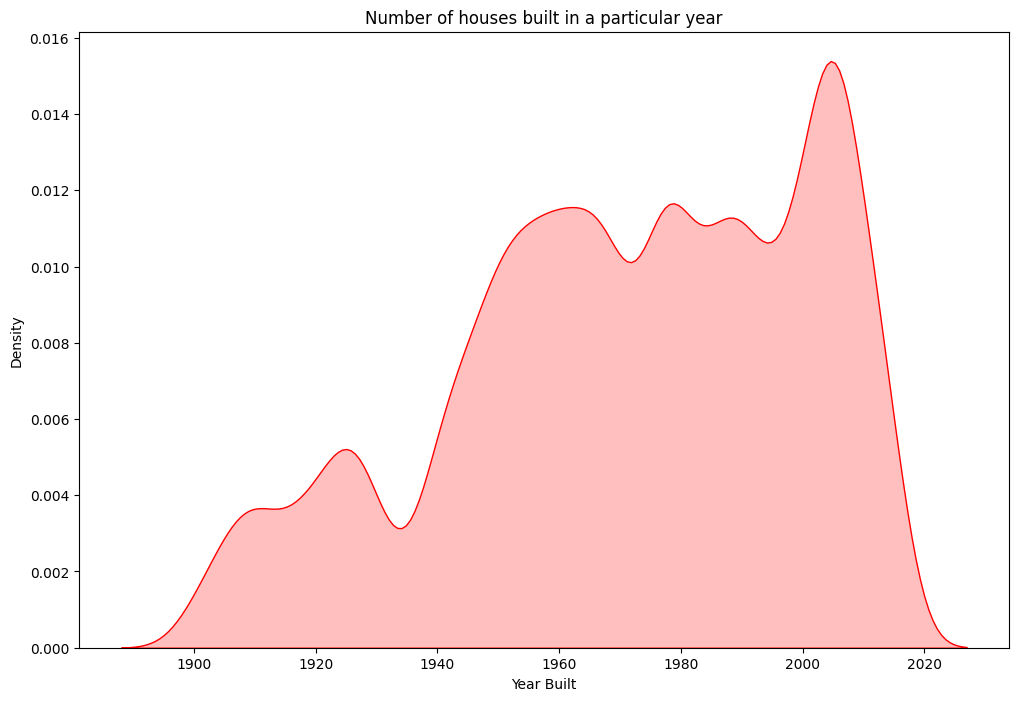

In [819]:
# Graphical representation of number of houses built in a particular year
plt.figure(figsize=(12, 8))
plt.title('Number of houses built in a particular year')
plt.xlabel('Year Built')
sns.kdeplot(df.yr_built, color='r', fill=True)

<Axes: title={'center': 'Square feet of the house vs. Number of bedrooms'}, xlabel='Square feet of the house', ylabel='Number of bedrooms'>

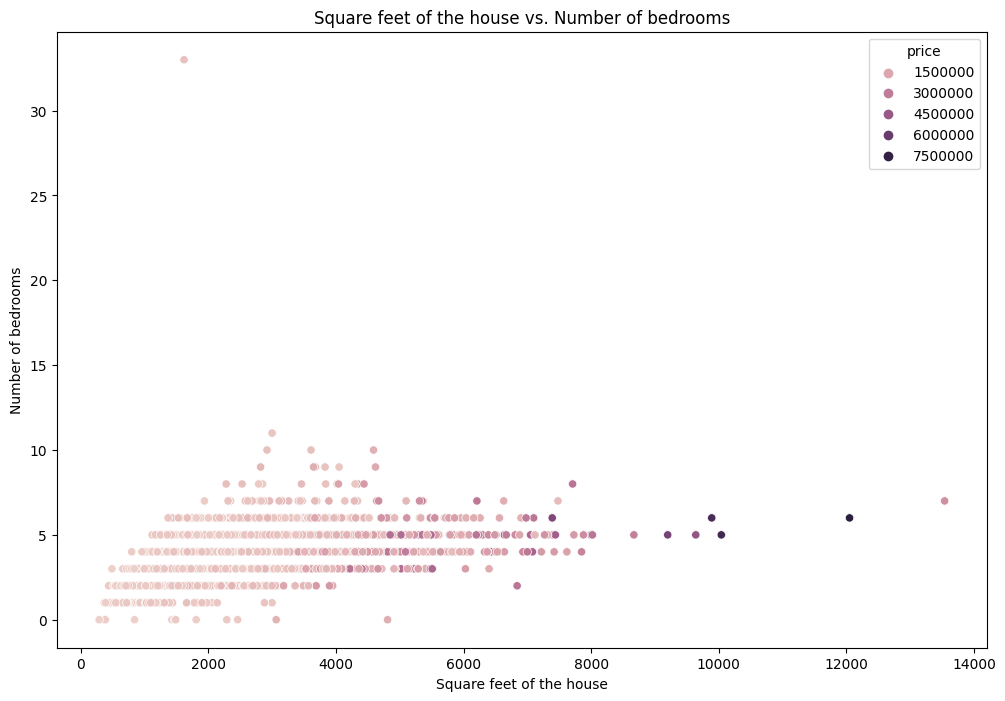

In [820]:
# Grafical representation of price of the houses depending on the number of bedrooms and square feet of the house
plt.figure(figsize=(12, 8))
plt.title('Square feet of the house vs. Number of bedrooms')
plt.xlabel('Square feet of the house')
plt.ylabel('Number of bedrooms')
sns.scatterplot(x='sqft_living', y='bedrooms', data=df, hue='price')

<Axes: title={'center': 'Square feet of the house vs. Number of bedrooms'}, xlabel='Square feet of the house', ylabel='Number of bedrooms'>

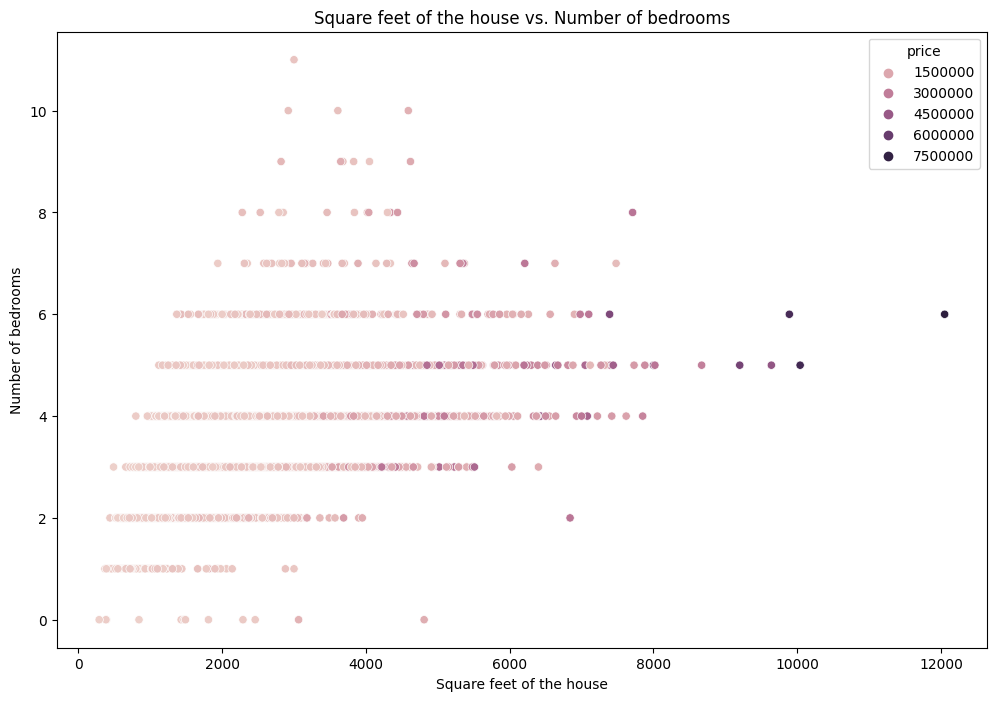

In [821]:
# Find and remove outliers
rows_to_remove = df[(df['bedrooms'] > 30) | (df['bathrooms'] > 8) | (df['sqft_living'] > 13000) | (df['sqft_lot'] > 500000)].index
df.drop(rows_to_remove, inplace=True)
plt.figure(figsize=(12, 8))
plt.title('Square feet of the house vs. Number of bedrooms')
plt.xlabel('Square feet of the house')
plt.ylabel('Number of bedrooms')
sns.scatterplot(x='sqft_living', y='bedrooms', data=df, hue='price')

<Axes: title={'center': 'Square feet of the house vs number of bathrooms'}, xlabel='Square feet of the house', ylabel='Number of bathrooms'>

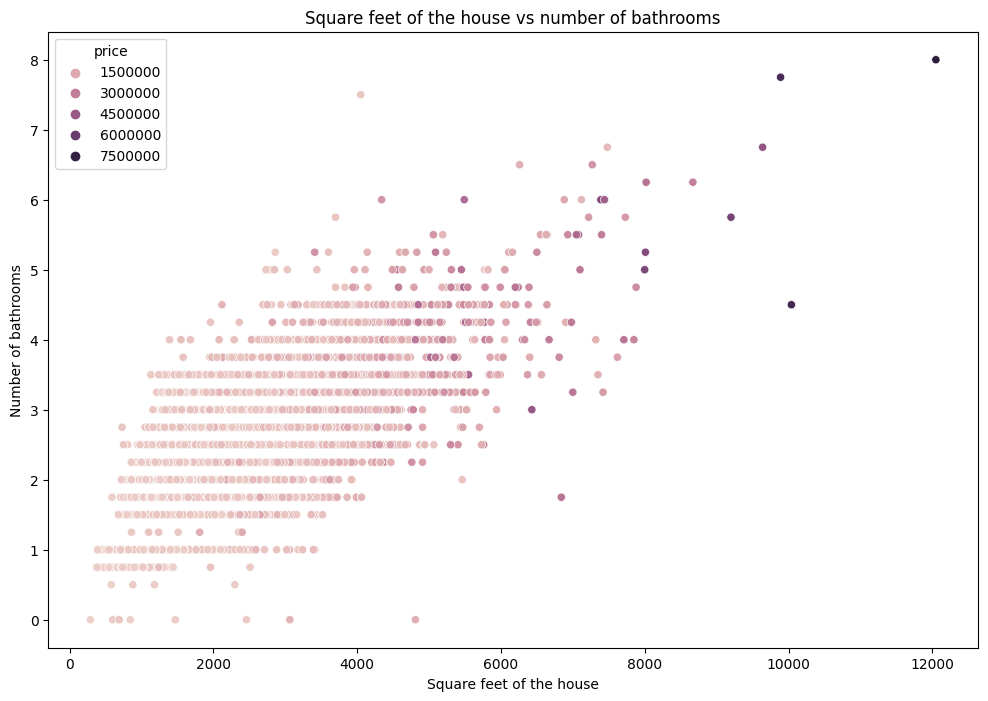

In [822]:
# Graphical representation of price of the houses depending on the number of bathrooms and square feet of the house
plt.figure(figsize=(12, 8))
plt.title('Square feet of the house vs number of bathrooms')
plt.xlabel('Square feet of the house')
plt.ylabel('Number of bathrooms')
sns.scatterplot(x='sqft_living', y='bathrooms', data=df, hue='price')

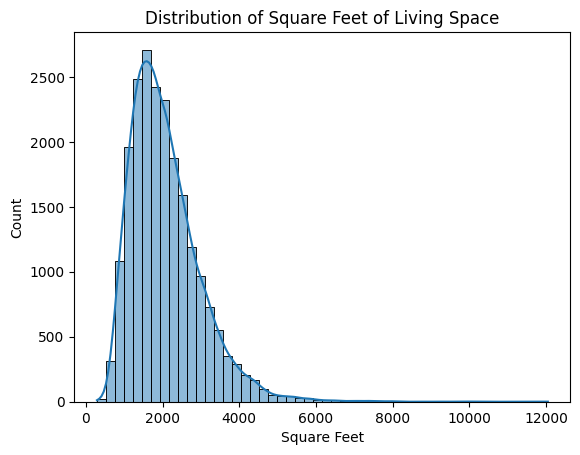

In [823]:
# Histogram of living space in square feet
sns.histplot(df['sqft_living'], bins=50, kde=True)
plt.title('Distribution of Square Feet of Living Space')
plt.xlabel('Square Feet')
plt.show()

<Axes: title={'center': 'Relationship between the price and the square feet of the house'}, xlabel='Square Feet', ylabel='Price'>

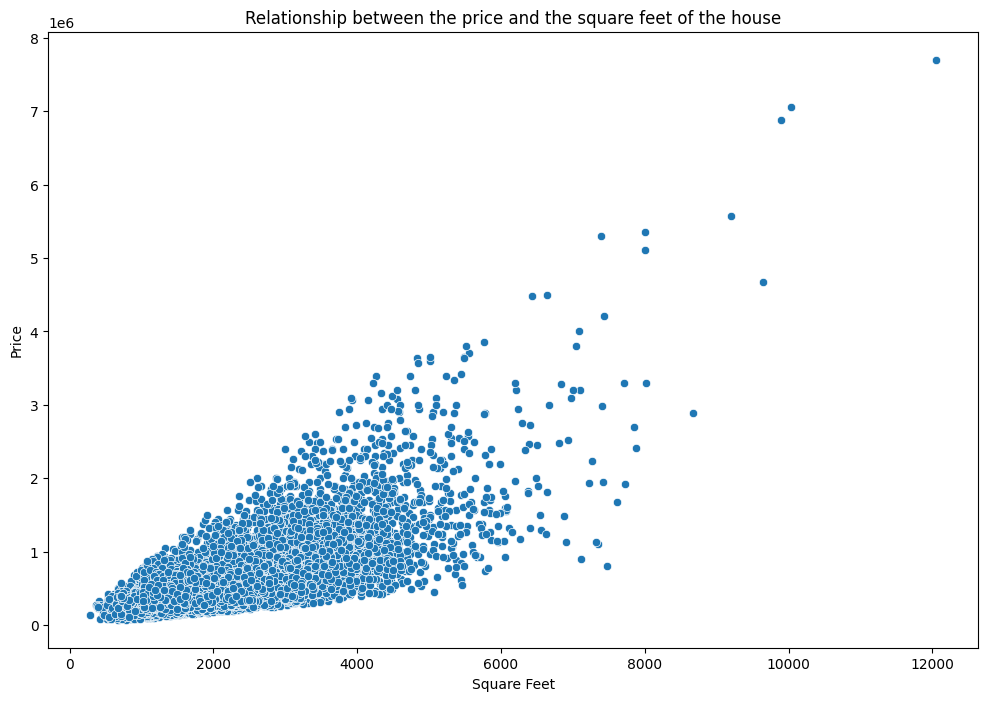

In [824]:
# Relationship between the price and the square feet of the house
plt.figure(figsize=(12, 8))
plt.title('Relationship between the price and the square feet of the house')
plt.xlabel('Square Feet')
plt.ylabel('Price')
sns.scatterplot(x='sqft_living', y='price', data=df)

<Axes: title={'center': 'Relationship between the price and the grade of the house'}, xlabel='Grade', ylabel='Price'>

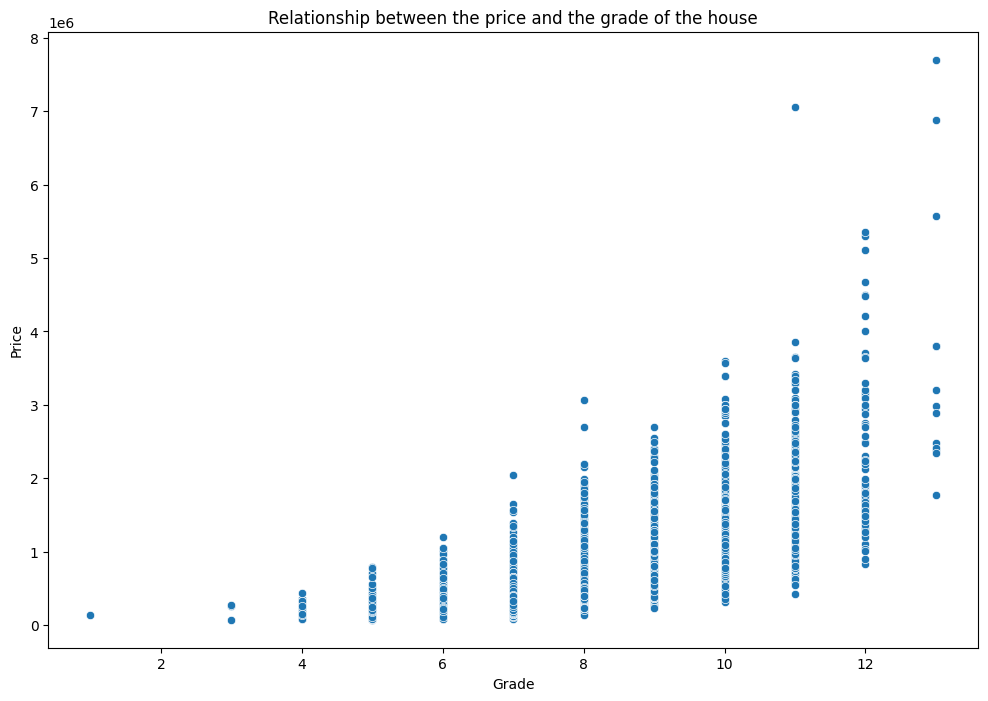

In [825]:
# Relationship between the price and the grade of the house
plt.figure(figsize=(12, 8))
plt.title('Relationship between the price and the grade of the house')
plt.xlabel('Grade')
plt.ylabel('Price')
sns.scatterplot(x='grade', y='price', data=df)

In [826]:
# View the correlation between the features
df_corr = df.corr()
df_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.315301,0.524180,0.702089,0.093344,0.255861,0.267012,0.396683,0.036908,0.666769,0.604576,0.323350,0.053071,0.126507,0.307788,0.019826,0.585386,0.076325
bedrooms,0.315301,1.000000,0.528980,0.592208,0.043342,0.180612,-0.006420,0.081034,0.025649,0.366498,0.490802,0.308529,0.159405,0.019341,-0.010927,0.133780,0.402345,0.032367
bathrooms,0.524180,0.528980,1.000000,0.753582,0.095555,0.500574,0.063740,0.186270,-0.124873,0.664458,0.683882,0.281744,0.506256,0.050589,0.024353,0.221991,0.568795,0.081456
sqft_living,0.702089,0.592208,0.753582,1.000000,0.197437,0.353300,0.104364,0.283247,-0.058288,0.763288,0.875889,0.432944,0.318072,0.055679,0.052344,0.239367,0.758043,0.178888
sqft_lot,0.093344,0.043342,0.095555,0.197437,1.000000,-0.013960,0.021937,0.077994,-0.012391,0.129285,0.207396,0.021095,0.065541,0.015147,-0.093947,0.261351,0.180706,0.781433
floors,0.255861,0.180612,0.500574,0.353300,-0.013960,1.000000,0.024310,0.028888,-0.263616,0.457625,0.523786,-0.247456,0.489221,0.006339,0.049487,0.125136,0.279436,-0.017704
waterfront,0.267012,-0.006420,0.063740,0.104364,0.021937,0.024310,1.000000,0.401974,0.016246,0.083100,0.072676,0.080185,-0.026074,0.093675,-0.013685,-0.040875,0.086708,0.033783
view,0.396683,0.081034,0.186270,0.283247,0.077994,0.028888,0.401974,1.000000,0.045961,0.251100,0.165881,0.276216,-0.053703,0.104432,0.006985,-0.079676,0.279950,0.070172
condition,0.036908,0.025649,-0.124873,-0.058288,-0.012391,-0.263616,0.016246,0.045961,1.000000,-0.144244,-0.158049,0.174652,-0.361438,-0.060148,-0.014204,-0.106457,-0.092723,-0.003367
grade,0.666769,0.366498,0.664458,0.763288,0.129285,0.457625,0.083100,0.251100,-0.144244,1.000000,0.755808,0.167458,0.446418,0.014208,0.114309,0.197382,0.713776,0.115693


## Setting up the models

In [827]:
# Prepare the data for the model, remove the price column and split the data into training and testing sets
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [828]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [829]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [830]:
# View the shape of the training and testing sets
X_train.shape, y_train.shape

((18351, 17), (18351,))

## Training the models

In [831]:
# First model with linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [832]:
# Create and see predictions
predictions = model.predict(X_test)
predictions

array([1370098.45962106,  832444.61800095,  651212.25284053, ...,
        392925.85009313,  406128.38429377,  465465.57878003])

In [833]:
# View score and metrics
score = r2_score(y_test, predictions)
print(f'R2 Score: {score}')
print(f'MAE: {mean_absolute_error(y_test, predictions)}')
print(f'MSE: {mean_squared_error(y_test, predictions)}')

R2 Score: 0.7103651621086338
MAE: 126788.943314431
MSE: 36332929171.09602


In [834]:
# Set other models of regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [835]:
# Create a list of models
models = [Ridge(), Lasso(), ElasticNet(), RandomForestRegressor(), GradientBoostingRegressor(), SVR(), KNeighborsRegressor()]

In [836]:
# Create a function to calculate the R2 score, MAE and MSE
def calculate_metrics(y_test, predictions):
    score = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    return score, mae, mse

In [837]:
# Create a function to train and test the models
def train_and_test(models, X_train, X_test, y_train, y_test):
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        score, mae, mse = calculate_metrics(y_test, predictions)
        print(f'{model} R2 Score: {score}')
        print(f'{model} MAE: {mae}')
        print(f'{model} MSE: {mse}')
        print('\n')

In [838]:
# Train and test the models
train_and_test(models, X_train, X_test, y_train, y_test)

Ridge() R2 Score: 0.7103779601993827
Ridge() MAE: 126781.80038781677
Ridge() MSE: 36331323728.43556




/Users/kamilo/.local/share/virtualenvs/RentalML-yTvkER2E/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.478e+14, tolerance: 2.497e+11
  model = cd_fast.enet_coordinate_descent(


Lasso() R2 Score: 0.7103669439241733
Lasso() MAE: 126788.04398423056
Lasso() MSE: 36332705653.17164




/Users/kamilo/.local/share/virtualenvs/RentalML-yTvkER2E/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.072e+14, tolerance: 2.497e+11
  model = cd_fast.enet_coordinate_descent(


ElasticNet() R2 Score: 0.6275436841974225
ElasticNet() MAE: 145357.83947496544
ElasticNet() MSE: 46722379945.39198


RandomForestRegressor() R2 Score: 0.8721687222177545
RandomForestRegressor() MAE: 70295.3305550361
RandomForestRegressor() MSE: 16035656467.731419


GradientBoostingRegressor() R2 Score: 0.8646828539818
GradientBoostingRegressor() MAE: 78566.5958158142
GradientBoostingRegressor() MSE: 16974713117.066904


SVR() R2 Score: -0.08234953755833452
SVR() MAE: 225315.51170506002
SVR() MSE: 135774167820.3268


KNeighborsRegressor() R2 Score: 0.509280894597941
KNeighborsRegressor() MAE: 159358.35899969126
KNeighborsRegressor() MSE: 61557727755.67787




<hr>